In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.autograd import Variable

import matplotlib.pyplot as plt


In [2]:
input_size = 784       
hidden_size = 200    
num_classes = 10       
num_epochs = 5        
batch_size = 100       
learning_rate = 0.001

In [3]:
train_dataset = datasets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = datasets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
train_dataset_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_dataset_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [5]:
len(train_dataset)

60000

In [7]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FNN, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, hidden_dim) 

        self.sigmoid = nn.Sigmoid()

        self.fc2 = nn.Linear(hidden_dim, hidden_dim) 

        self.fc3 = nn.Linear(hidden_dim, output_dim) 

        
         

    def forward(self, x):
        
        out = self.fc1(x)

       
        out = self.sigmoid(out)

        
        out = self.fc2(out)

        out = self.fc3(out)

        return out


In [8]:
model = FNN(input_size, hidden_size, num_classes)
losses = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
print(model)

FNN(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)


Epoch [1/5], Step [100/600], Loss: 0.3447
Epoch [1/5], Step [200/600], Loss: 0.2653
Epoch [1/5], Step [300/600], Loss: 0.3782
Epoch [1/5], Step [400/600], Loss: 0.3597
Epoch [1/5], Step [500/600], Loss: 0.2126
Epoch [1/5], Step [600/600], Loss: 0.2715
Epoch [2/5], Step [100/600], Loss: 0.2232
Epoch [2/5], Step [200/600], Loss: 0.1282
Epoch [2/5], Step [300/600], Loss: 0.1758
Epoch [2/5], Step [400/600], Loss: 0.2242
Epoch [2/5], Step [500/600], Loss: 0.1227
Epoch [2/5], Step [600/600], Loss: 0.1840
Epoch [3/5], Step [100/600], Loss: 0.2403
Epoch [3/5], Step [200/600], Loss: 0.1504
Epoch [3/5], Step [300/600], Loss: 0.1194
Epoch [3/5], Step [400/600], Loss: 0.0688
Epoch [3/5], Step [500/600], Loss: 0.1896
Epoch [3/5], Step [600/600], Loss: 0.0807
Epoch [4/5], Step [100/600], Loss: 0.0836
Epoch [4/5], Step [200/600], Loss: 0.0989
Epoch [4/5], Step [300/600], Loss: 0.0278
Epoch [4/5], Step [400/600], Loss: 0.0590
Epoch [4/5], Step [500/600], Loss: 0.0714
Epoch [4/5], Step [600/600], Loss:

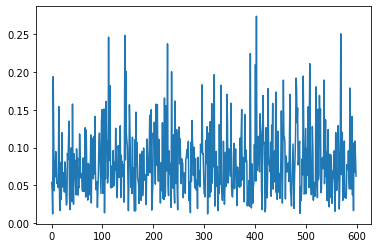

In [10]:
for epoch in range(num_epochs):
    losses_list = []
    for i, (images, labels) in enumerate(train_dataset_loader):   
        images = Variable(images.view(-1, 28*28))         
        labels = Variable(labels)
        
        opt.zero_grad()                            
        outputs = model(images)                             
        loss = losses(outputs, labels)
        losses_list.append(loss.detach().numpy())                
        loss.backward()                                   
        opt.step()                                 
        
        if (i+1) % 100 == 0:                             
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, (len(train_dataset)/batch_size), loss.item()))
            
plt.plot(losses_list)

Accuracy of the network on the 10K test images: 97 %


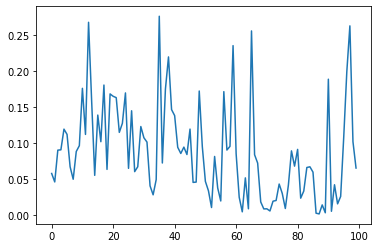

In [11]:
correct = 0
total = 0
test_loss = []
for images, labels in test_dataset_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)  
    total += labels.size(0)                    
    correct += (predicted == labels).sum() 
    loss = losses(outputs,labels) 
    test_loss.append(loss.detach().numpy())

    
print('Accuracy of the network on the 10K test images: %d %%' % (100 * correct / total))
plt.plot(test_loss)


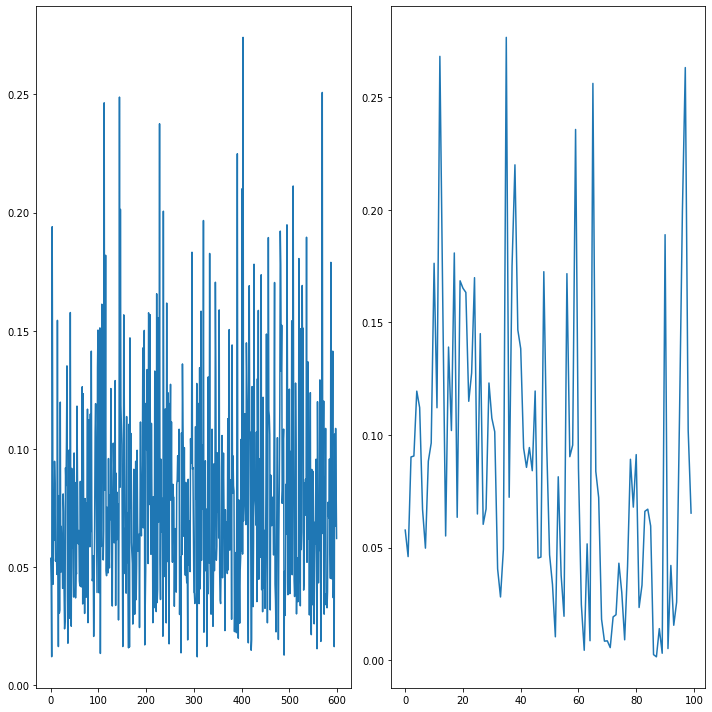

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].plot(losses_list)
axes[1].plot(test_loss)
fig.tight_layout()